In [1]:
fn = r"C:\Users\Kanishk Goyal\Downloads\GPCC_total_precipitation_mon_0.25x0.25_global_2017_v2020.0.nc"

In [2]:
import geopandas as gpd
import imdlib as imd
import xarray as xr
import numpy as np
import pandas as pd

In [3]:
file_name = r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Shape file for Districts India\output.shp"
gdf = gpd.read_file(file_name)

In [4]:
statename = 'Uttar Pradesh'
my = gdf[gdf.statename == statename]
dist_list = pd.Series(my['distname'])
pd.set_option('display.max_columns', None)
dist_list_values = dist_list.tolist()

In [5]:
import xarray as xr
xarray = xr.open_dataset(fn)

In [6]:
xarray

<xarray.Dataset>
Dimensions:  (time: 12, lon: 1440, lat: 720)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01 2017-02-01 ... 2017-12-01
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes: (12/21)
    CDI:                       Climate Data Interface version 1.9.10 (https:/...
    institution:               Deutscher Wetterdienst
    Conventions:               CF-1.4
    title:                     GPCC Full Data Monthly Product Version 2020, p...
    summary:                   The Full Data Monthly Product is of much highe...
    keywords:                  precipitation climatology,gpcc,global,gpcp,
    ...                        ...
    geospatial_lon_max:        180.
    doi:                       10.5676/DWD_GPCC/FD_M_V2020_025
    history:                   Fri Jun 18 08:27:02 2021: cdo -O -splityear /d...
    time_coverage_start:       1891-01-01 00:00:00
    time_coverage_end:         2019-12-01 00:00:00
    CDO:                       Climate Data Operators version 1.9.10 (https:/...

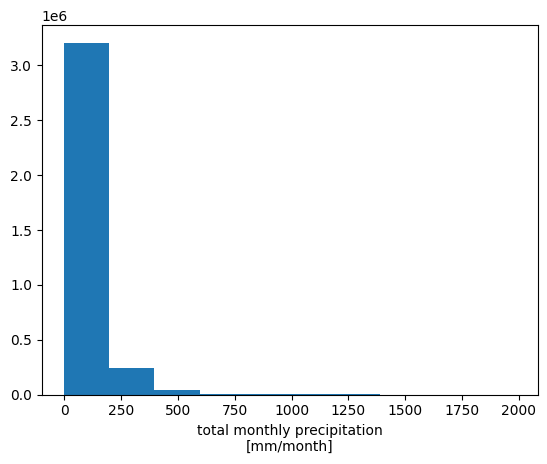

In [7]:
xarray['pr'].plot()
import matplotlib.pyplot as plt
# Show the plot
plt.show()

In [8]:
time_ = '2017-01-01'
xarray_ = xarray.sel(time = time_)

In [9]:
xarray_

<xarray.Dataset>
Dimensions:  (lon: 1440, lat: 720)
Coordinates:
    time     datetime64[ns] 2017-01-01
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
Data variables:
    pr       (lat, lon) float32 ...
Attributes: (12/21)
    CDI:                       Climate Data Interface version 1.9.10 (https:/...
    institution:               Deutscher Wetterdienst
    Conventions:               CF-1.4
    title:                     GPCC Full Data Monthly Product Version 2020, p...
    summary:                   The Full Data Monthly Product is of much highe...
    keywords:                  precipitation climatology,gpcc,global,gpcp,
    ...                        ...
    geospatial_lon_max:        180.
    doi:                       10.5676/DWD_GPCC/FD_M_V2020_025
    history:                   Fri Jun 18 08:27:02 2021: cdo -O -splityear /d...
    time_coverage_start:       1891-01-01 00:00:00
    time_coverage_end:         2019-12-01 00:00:00
    CDO:                       Climate Data Operators version 1.9.10 (https:/...

In [10]:
nan_count = np.isnan(xarray_['pr']).sum()
nan_count
# Print the count of NaN values
#print(f"Number of NaN values in 't2m': {nan_count}")

<xarray.DataArray 'pr' ()>
array(745460)
Coordinates:
    time     datetime64[ns] 2017-01-01

In [ ]:
    import rasterio
    import rasterio.features
    import numpy as np
    lon_values = xarray_.lon.values
    lat_values = xarray_.lat.values
    lon_spacing = lon_values[1] - lon_values[0]
    lat_spacing = lat_values[1] - lat_values[0]
    transform = rasterio.transform.from_origin(lon_values[0], lat_values[-1], lon_spacing, lat_spacing)

In [11]:
import rasterio
import rasterio.features
import numpy as np
lon_values = xarray_.lon.values
lat_values = xarray_.lat.values
lon_spacing = lon_values[1] - lon_values[0]
lat_spacing = lat_values[1] - lat_values[0]
transform = rasterio.transform.from_origin(lon_values[0], lat_values[-1], lon_spacing, lat_spacing)
lat_size = xarray_.lat.size
lon_size = xarray_.lon.size
data = []
for district in dist_list_values:
    adf = my[my.distname==district]
    district_shape = adf.geometry
    
    mask = rasterio.features.geometry_mask(district_shape, out_shape=(lat_size, lon_size),
                                       transform=transform, invert=True)
    print(district)
    #print("Mask:", mask)
    #print("Lon values:", lon_values)
    #print("Lat values:", lat_values)
    print(mask.dtype)
    print(mask.shape)
    print('--------------')
    #print("District:", district)
    # Count the number of True and False values
    num_true = np.count_nonzero(mask)
    num_false = mask.size - num_true
    # Print the counts
    print(f"Number of True values: {num_true}")
    print(f"Number of False values: {num_false}")
    print('--------------')
    masked_xarray = xarray_.where(mask)
    nan_count_masked = np.isnan(masked_xarray['pr']).sum()
    print(f"Number of NaN values in 'pr': {nan_count_masked}")
    print('--------------')
    true_coords = np.column_stack(np.where(mask))
    print("True coordinates are:",true_coords)
    true_latitudes = masked_xarray.lat.values[true_coords[:, 0]]
    true_longitudes = masked_xarray.lon.values[true_coords[:, 1]]
    print("True Latitudes:",true_latitudes)
    print("True Longitudes:",true_longitudes)
    #corresponding_values = masked_xarray.sel(latitude= true_coords[:, 0], longitude = true_coords[:, 1])
    #result_df = pd.DataFrame({'latitude': true_latitudes, 'longitude': true_longitudes, 'value': corresponding_values})
    #print(result_df)
    print('--------------')
    
    for var_name in masked_xarray.data_vars:
        alpha = np.nanmean(masked_xarray[var_name])
    
    mean_ssr = masked_xarray['pr'].mean()

    # Print the mean value
    print("Mean SSR:", mean_ssr.item())
    print("Mean:",alpha)
    print('******************************************************************')


Ambedkar Nagar
bool
(720, 1440)
--------------
Number of True values: 2
Number of False values: 1036798
--------------
Number of NaN values in 'pr': <xarray.DataArray 'pr' ()>
array(1036800)
Coordinates:
    time     datetime64[ns] 2017-01-01
--------------
True coordinates are: [[ 465 1049]
 [ 465 1050]]
True Latitudes: [-26.375 -26.375]
True Longitudes: [82.375 82.625]
--------------
Mean SSR: nan
Mean: nan
******************************************************************
Ballia
bool
(720, 1440)
--------------
Number of True values: 4
Number of False values: 1036796
--------------
Number of NaN values in 'pr': <xarray.DataArray 'pr' ()>
array(1036800)
Coordinates:
    time     datetime64[ns] 2017-01-01
--------------
True coordinates are: [[ 462 1055]
 [ 462 1056]
 [ 462 1057]
 [ 463 1055]]
True Latitudes: [-25.625 -25.625 -25.625 -25.875]
True Longitudes: [83.875 84.125 84.375 83.875]
--------------
Mean SSR: nan
Mean: nan
***********************************************************

In [ ]:
import numpy as np

lat = 26.389221071585485
lon = 80.21232990145526

# Calculate Euclidean distance
distances = np.sqrt((xarray_.longitude - lon)**2 + (xarray_.latitude - lat)**2)

# Find the index with minimum distance
min_distance_idx = distances.argmin(dim=["latitude", "longitude"])

# Retrieve the value at the index
values_ = xarray_['t2m'].isel(latitude=min_distance_idx['latitude'].item(), 
                               longitude=min_distance_idx['longitude'].item()).values


In [ ]:
print(xarray_['latitude'].isel(latitude=min_distance_idx['latitude']).values)
print(xarray_['longitude'].isel(longitude=min_distance_idx['longitude']).values)
print(values_)